<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #11: Análisis de sentimiento
'Fecha de entrega: Noviembre 21, 2020 (Antes del inicio de la próxima clase).'

'Modo de entrega: Subir link de GitHub al aula virtual.'

###  `[25 pts]` Punto 1: Hacer análisis de sentimiento de los datos del anterior taller
- Columna con el puntaje numérico del sentimiento
- Pueden usar cualquiera de las librerias vistas en clase

In [1]:
import pandas as pd
import tweepy
import re
import regex
import emoji

In [2]:
# Leer llaves
keys = pd.read_csv("keys.csv", header=None) #se deja con la etiqueta None ya que no tiene titulos el archivo
keys = dict(zip(keys[0],keys[1])) #se deja en modo diccionario

In [3]:
# Autorizar a través API
auth = tweepy.OAuthHandler(keys['API_key'], keys['API_key_secret'])
auth.set_access_token(keys['acces_token'], keys['acces_token_secret'])
api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
#Recolectar información: Tweets de la cuidad de Bogotá
tweets = tweepy.Cursor(api.search,
                       q=['IOTA -RT'],
                       lang='es',
                       geocode=f'4.60971,-74.08175,45mi',
                       tweet_mode='extended',
                       include_rts=False).items(500)

In [5]:
t = []

for tweet in tweets:
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append("Bogota")
    temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/status/{tweet.id}")
    
    t.append(temp)

In [6]:
data = pd.DataFrame(t)
data.columns = ['tweet', 'date', 'city', 'user_location', 'id', 'link']
data.head()

,tweet,date,city,user_location,id,link
0,"@WRadioColombia @IvanDuque, se le comunica con...",2020-11-21 04:24:41,Bogota,Bogota,1330004180979896320,https://twitter.com/i/web/status/1330004180979...
1,"@IvanDuque, se le comunica con anticipación, p...",2020-11-21 04:23:52,Bogota,Bogota,1330003974221688832,https://twitter.com/i/web/status/1330003974221...
2,@teleislas lanza campaña para ayudar a familia...,2020-11-21 03:19:35,Bogota,"Bogotá, D.C., Colombia",1329987797323837442,https://twitter.com/i/web/status/1329987797323...
3,El Gobierno de Estados Unidos donó 100.000 dól...,2020-11-21 03:00:01,Bogota,Bogotá,1329982872384466946,https://twitter.com/i/web/status/1329982872384...
4,#ESTRENO\n\n🌊 Mientras que el Huracán Iota dej...,2020-11-21 02:30:03,Bogota,Bogotá-Colombia,1329975331822989312,https://twitter.com/i/web/status/1329975331822...


In [7]:
#Visualizamos sólo las columnas tweet, date y city
data = data[['tweet', 'date', 'city']]
data.head()

,tweet,date,city
0,"@WRadioColombia @IvanDuque, se le comunica con...",2020-11-21 04:24:41,Bogota
1,"@IvanDuque, se le comunica con anticipación, p...",2020-11-21 04:23:52,Bogota
2,@teleislas lanza campaña para ayudar a familia...,2020-11-21 03:19:35,Bogota
3,El Gobierno de Estados Unidos donó 100.000 dól...,2020-11-21 03:00:01,Bogota
4,#ESTRENO\n\n🌊 Mientras que el Huracán Iota dej...,2020-11-21 02:30:03,Bogota


In [8]:
# Realizamos el Preprocesamiento de la data: Se depuran emojis, hashtags, hipervinculos

import re

pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
pattern2 = '?P<url>https?://[^\s]+'

def text_clean(row):
    text = row['tweet']
    
    links = [tuple(j for j in i if j)[-1] for i in re.findall(f"({pattern1})|({pattern2})",text)]
    for link in links:
        text = text.replace(link,"")
             
    hashtags = [interaction for interaction in text.split() if interaction.startswith("#")]
    for hashtag in hashtags:
        text = text.replace(hashtag,"")
        
    mentions = [interaction for interaction in text.split() if interaction.startswith("@")]
    for mention in mentions:
        text = text.replace(mention,"")
        
    return text, links, hashtags, mentions
data[['clean', 'links', 'hashtags', 'mentions']] = data.apply(text_clean, axis=1, result_type='expand')
data.head()

,tweet,date,city,clean,links,hashtags,mentions
0,"@WRadioColombia @IvanDuque, se le comunica con...",2020-11-21 04:24:41,Bogota,"se le comunica con anticipación, para q inte...",[https://t.co/oVbFZXX9AG],[],"[@WRadioColombia, @IvanDuque,]"
1,"@IvanDuque, se le comunica con anticipación, p...",2020-11-21 04:23:52,Bogota,"se le comunica con anticipación, para q inter...","[https://t.co/obCKA45cju, https://t.co/jnusfx1...",[],"[@IvanDuque,]"
2,@teleislas lanza campaña para ayudar a familia...,2020-11-21 03:19:35,Bogota,lanza campaña para ayudar a familias afectada...,[https://t.co/Zu4so7UuwB],[#NoticiasCapital],"[@teleislas, @CanalCapital]"
3,El Gobierno de Estados Unidos donó 100.000 dól...,2020-11-21 03:00:01,Bogota,El Gobierno de Estados Unidos donó 100.000 dól...,[https://t.co/mzF7ocC5Uf],[],[]
4,#ESTRENO\n\n🌊 Mientras que el Huracán Iota dej...,2020-11-21 02:30:03,Bogota,\n\n🌊 Mientras que el Huracán Iota dejó perdid...,"[https://t.co/7aJFvQGpnZ, https://t.co/51ojcZX...",[#ESTRENO],[]


In [9]:
import regex
import emoji

def get_emojis(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

data['emojis'] = data['clean'].apply(lambda text: get_emojis(text))
data.head()

,tweet,date,city,clean,links,hashtags,mentions,emojis
0,"@WRadioColombia @IvanDuque, se le comunica con...",2020-11-21 04:24:41,Bogota,"se le comunica con anticipación, para q inte...",[https://t.co/oVbFZXX9AG],[],"[@WRadioColombia, @IvanDuque,]",[]
1,"@IvanDuque, se le comunica con anticipación, p...",2020-11-21 04:23:52,Bogota,"se le comunica con anticipación, para q inter...","[https://t.co/obCKA45cju, https://t.co/jnusfx1...",[],"[@IvanDuque,]",[]
2,@teleislas lanza campaña para ayudar a familia...,2020-11-21 03:19:35,Bogota,lanza campaña para ayudar a familias afectada...,[https://t.co/Zu4so7UuwB],[#NoticiasCapital],"[@teleislas, @CanalCapital]",[]
3,El Gobierno de Estados Unidos donó 100.000 dól...,2020-11-21 03:00:01,Bogota,El Gobierno de Estados Unidos donó 100.000 dól...,[https://t.co/mzF7ocC5Uf],[],[],[]
4,#ESTRENO\n\n🌊 Mientras que el Huracán Iota dej...,2020-11-21 02:30:03,Bogota,\n\n🌊 Mientras que el Huracán Iota dejó perdid...,"[https://t.co/7aJFvQGpnZ, https://t.co/51ojcZX...",[#ESTRENO],[],"[🌊, ⤵, 👉]"


In [14]:
from googletrans import Translator
translator = Translator()
data['ing'] = data['clean'].apply(lambda valor: translator.translate(valor, src='es', dest='en'))
data.head()

,tweet,date,city,clean,links,hashtags,mentions,emojis,ing
0,"@WRadioColombia @IvanDuque, se le comunica con...",2020-11-21 04:24:41,Bogota,"se le comunica con anticipación, para q inte...",[https://t.co/oVbFZXX9AG],[],"[@WRadioColombia, @IvanDuque,]",[],"Translated(src=es, dest=en, text=It is communi..."
1,"@IvanDuque, se le comunica con anticipación, p...",2020-11-21 04:23:52,Bogota,"se le comunica con anticipación, para q inter...","[https://t.co/obCKA45cju, https://t.co/jnusfx1...",[],"[@IvanDuque,]",[],"Translated(src=es, dest=en, text=It is communi..."
2,@teleislas lanza campaña para ayudar a familia...,2020-11-21 03:19:35,Bogota,lanza campaña para ayudar a familias afectada...,[https://t.co/Zu4so7UuwB],[#NoticiasCapital],"[@teleislas, @CanalCapital]",[],"Translated(src=es, dest=en, text=launches camp..."
3,El Gobierno de Estados Unidos donó 100.000 dól...,2020-11-21 03:00:01,Bogota,El Gobierno de Estados Unidos donó 100.000 dól...,[https://t.co/mzF7ocC5Uf],[],[],[],"Translated(src=es, dest=en, text=The United St..."
4,#ESTRENO\n\n🌊 Mientras que el Huracán Iota dej...,2020-11-21 02:30:03,Bogota,\n\n🌊 Mientras que el Huracán Iota dejó perdid...,"[https://t.co/7aJFvQGpnZ, https://t.co/51ojcZX...",[#ESTRENO],[],"[🌊, ⤵, 👉]","Translated(src=es, dest=en, text=🌊 While Hurri..."


In [15]:
data['ingles'] = data['ing'].apply(lambda valor: valor.text)
data.head()

,tweet,date,city,clean,links,hashtags,mentions,emojis,ing,ingles
0,"@WRadioColombia @IvanDuque, se le comunica con...",2020-11-21 04:24:41,Bogota,"se le comunica con anticipación, para q inte...",[https://t.co/oVbFZXX9AG],[],"[@WRadioColombia, @IvanDuque,]",[],"Translated(src=es, dest=en, text=It is communi...","It is communicated to him in advance, so that ..."
1,"@IvanDuque, se le comunica con anticipación, p...",2020-11-21 04:23:52,Bogota,"se le comunica con anticipación, para q inter...","[https://t.co/obCKA45cju, https://t.co/jnusfx1...",[],"[@IvanDuque,]",[],"Translated(src=es, dest=en, text=It is communi...","It is communicated to him in advance, so that ..."
2,@teleislas lanza campaña para ayudar a familia...,2020-11-21 03:19:35,Bogota,lanza campaña para ayudar a familias afectada...,[https://t.co/Zu4so7UuwB],[#NoticiasCapital],"[@teleislas, @CanalCapital]",[],"Translated(src=es, dest=en, text=launches camp...",launches campaign to help families affected in...
3,El Gobierno de Estados Unidos donó 100.000 dól...,2020-11-21 03:00:01,Bogota,El Gobierno de Estados Unidos donó 100.000 dól...,[https://t.co/mzF7ocC5Uf],[],[],[],"Translated(src=es, dest=en, text=The United St...","The United States Government donated $ 100,000..."
4,#ESTRENO\n\n🌊 Mientras que el Huracán Iota dej...,2020-11-21 02:30:03,Bogota,\n\n🌊 Mientras que el Huracán Iota dejó perdid...,"[https://t.co/7aJFvQGpnZ, https://t.co/51ojcZX...",[#ESTRENO],[],"[🌊, ⤵, 👉]","Translated(src=es, dest=en, text=🌊 While Hurri...",🌊 While Hurricane Iota left incalculable losse...


In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [17]:
data['sentimiento'] = data['ingles'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
data.head()

,tweet,date,city,clean,links,hashtags,mentions,emojis,ing,ingles,sentimiento
0,"@WRadioColombia @IvanDuque, se le comunica con...",2020-11-21 04:24:41,Bogota,"se le comunica con anticipación, para q inte...",[https://t.co/oVbFZXX9AG],[],"[@WRadioColombia, @IvanDuque,]",[],"Translated(src=es, dest=en, text=It is communi...","It is communicated to him in advance, so that ...",0.0258
1,"@IvanDuque, se le comunica con anticipación, p...",2020-11-21 04:23:52,Bogota,"se le comunica con anticipación, para q inter...","[https://t.co/obCKA45cju, https://t.co/jnusfx1...",[],"[@IvanDuque,]",[],"Translated(src=es, dest=en, text=It is communi...","It is communicated to him in advance, so that ...",0.0258
2,@teleislas lanza campaña para ayudar a familia...,2020-11-21 03:19:35,Bogota,lanza campaña para ayudar a familias afectada...,[https://t.co/Zu4so7UuwB],[#NoticiasCapital],"[@teleislas, @CanalCapital]",[],"Translated(src=es, dest=en, text=launches camp...",launches campaign to help families affected in...,0.2732
3,El Gobierno de Estados Unidos donó 100.000 dól...,2020-11-21 03:00:01,Bogota,El Gobierno de Estados Unidos donó 100.000 dól...,[https://t.co/mzF7ocC5Uf],[],[],[],"Translated(src=es, dest=en, text=The United St...","The United States Government donated $ 100,000...",0.4215
4,#ESTRENO\n\n🌊 Mientras que el Huracán Iota dej...,2020-11-21 02:30:03,Bogota,\n\n🌊 Mientras que el Huracán Iota dejó perdid...,"[https://t.co/7aJFvQGpnZ, https://t.co/51ojcZX...",[#ESTRENO],[],"[🌊, ⤵, 👉]","Translated(src=es, dest=en, text=🌊 While Hurri...",🌊 While Hurricane Iota left incalculable losse...,-0.6597


###  '[10 pts]' Punto 2: ¿Cuál es el tuit más positivo y más negativo?

In [18]:
data[['clean', 'sentimiento']].sort_values('sentimiento',ascending=False)

,clean,sentimiento
89,Pero lo vieron hoy opinando como todo un loor....,0.9761
149,📣 📣 Ponte la mano en el corazón y ayudemos a l...,0.9098
243,¡Javeriano! Ponte la mano en el corazón y ayud...,0.8774
272,Comparto este recuerdo d mi paso como volunta...,0.8608
186,Más de 700 familias resultaron afectadas y 1.4...,0.8268
...,...,...
154,EL TIEMPO fue uno de los primeros medios de co...,-0.8555
93,Días de angustia y desesperación ha vivido la ...,-0.8555
248,Crece el drama invernal en La Guajira. En Urib...,-0.8807
207,tus manos también están bañadas con la sangre...,-0.8979


### Tuit mas positivo


In [19]:
data.loc[89]['clean']

'Pero lo vieron hoy opinando como todo un loor. Dice que el huracán Iota, había sido mejor subterráneo y no aéreo como lo conformó  . Muy de acuerdo con Petro. '

In [20]:
data[['clean', 'sentimiento']].sort_values('sentimiento')

,clean,sentimiento
228,Dos personas muertas y el 98 por ciento de la ...,-0.9217
207,tus manos también están bañadas con la sangre...,-0.8979
248,Crece el drama invernal en La Guajira. En Urib...,-0.8807
93,Días de angustia y desesperación ha vivido la ...,-0.8555
154,EL TIEMPO fue uno de los primeros medios de co...,-0.8555
...,...,...
186,Más de 700 familias resultaron afectadas y 1.4...,0.8268
272,Comparto este recuerdo d mi paso como volunta...,0.8608
243,¡Javeriano! Ponte la mano en el corazón y ayud...,0.8774
149,📣 📣 Ponte la mano en el corazón y ayudemos a l...,0.9098


### Tuit mas Negativo


In [21]:
data.loc[228]['clean']

'Dos personas muertas y el 98 por ciento de la afectación estructural, el balance que por ahora se conoce del paso del huracán  Iota en la isla de Providencia.  San Andrés sufrió daños en algunas estructuras. Hablamos con el gobernador del archipiélago.  '

###  '[15 pts]' Punto 3: ¿Cuántos tuits positivos/negativos hay en sus datos?

In [22]:
contar = len(data.sentimiento[data.sentimiento>0])
print(f"Hay", +contar, "tuis positivos en este ejemplo")


Hay 119 tuis positivos en este ejemplo


In [23]:
contar2 = len(data.sentimiento[data.sentimiento<0])
print(f"Hay", +contar2, "tuis negativos en este ejemplo")



Hay 151 tuis negativos en este ejemplo


###  [BONUS 5pts] : Diagrama de barras de la pregunta 3

###  '[BONUS 7pts]' : Nubes de palabras por sentimiento

In [24]:
import numpy as np
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')
import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

## Tuist Positivos
palabras= data.clean[data.sentimiento>0].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400,

    max_font_size=150, max_words=280,
    background_color='deepskyblue', colormap='gist_heat',
    stopwords=stopwords).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
 
plt.figure(figsize=(9,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

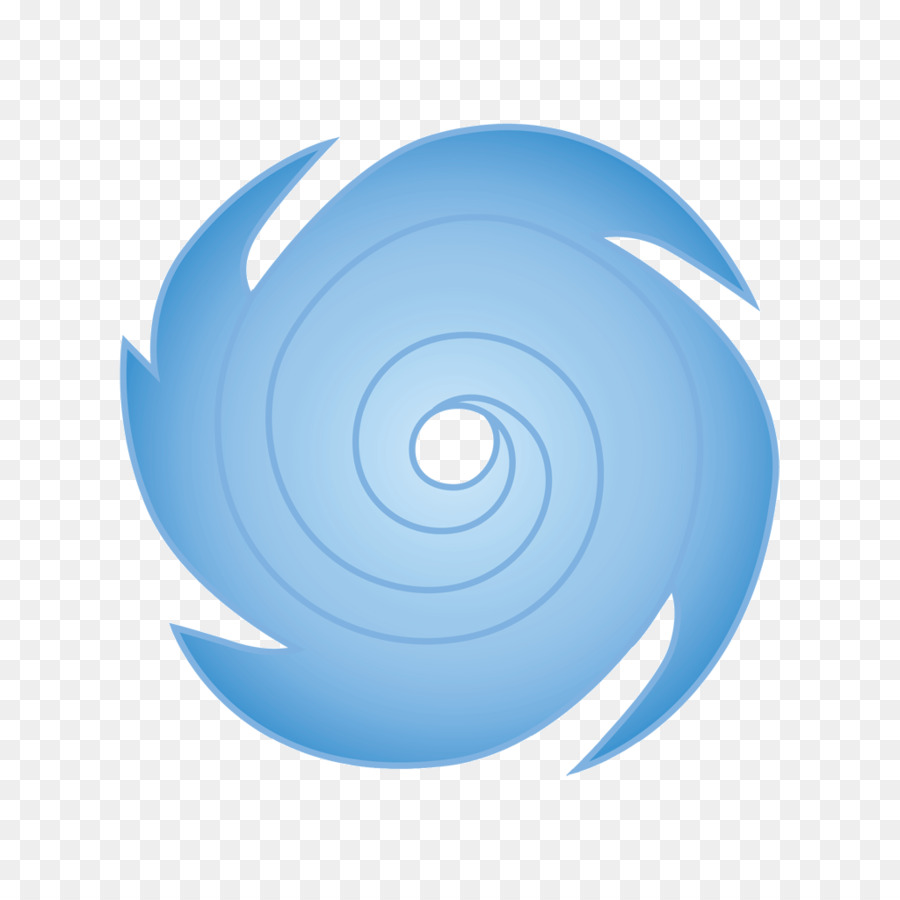

In [68]:
hur = PIL.Image.open("img/huracan.jpg")
display(hur)

In [69]:
mask = np.array(hur)
mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

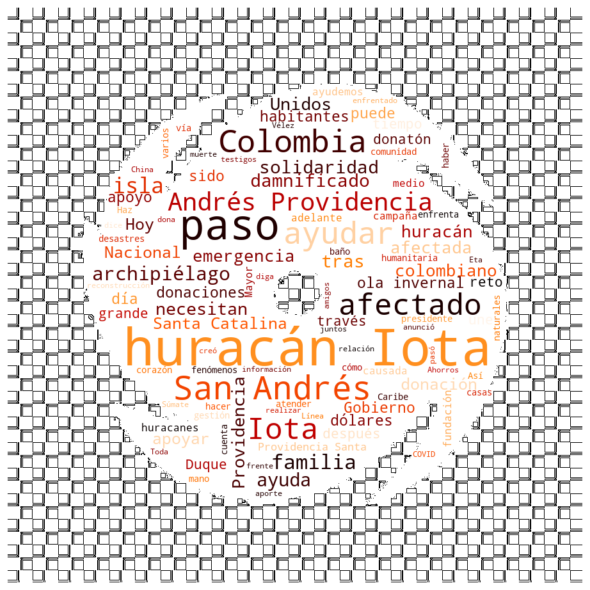

In [70]:
palabras = data.clean[data.sentimiento>0].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400,

                      max_font_size=500, max_words=100,
                      background_color='white', colormap='gist_heat',
                      stopwords=stopwords,
                      mask=mask, contour_width=0.5, contour_color='black').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
 
wordcloud.to_file("crown.png")
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Tuist Negativos


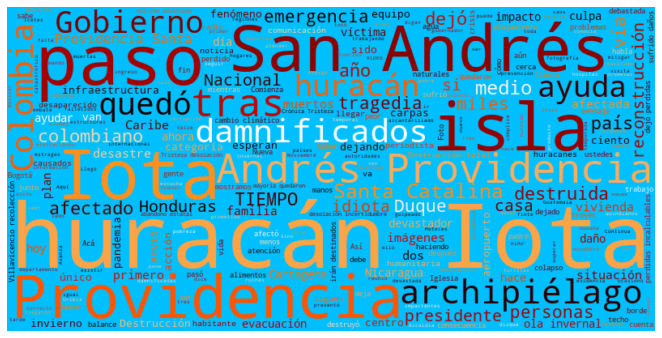

In [72]:
palabras= data.clean[data.sentimiento<0].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400,

    max_font_size=150, max_words=280,
    background_color='deepskyblue', colormap='gist_heat',
    stopwords=stopwords).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
 
plt.figure(figsize=(9,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()